# **Analyzing Avaiation Accident Reports**
##  Our company wants to expand it's portfolio into the commercial and private aviation sectors. The core business challenge is the lack of domain knowledge regarding aircraft safety and operational risk. This notebook serves as the initial, critical phase: to determine which specific aircraft models (Make and Model) present the lowest risk profile for acquisition and operation.

### **1.Data Inspection**
#### *In the subsequent cells we are going to import our libraries and check what is in our file, this information will help identify which critical columns are missing data and also get to know where we need to focus our cleaning efforts.*

In [2]:
# Loading the AviationData CSV file into a Pandas DataFrame
df =pd.read_csv("AviationData.csv",encoding ='ISO-8859-1')


c:\Users\PC\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [4]:
#chacking the first few rows in our column
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,10/24/1948,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,7/19/1962,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,8/30/1974,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,6/19/1977,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12/9/2000
4,20041105X01764,Accident,CHI79FA064,8/2/1979,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [5]:
df['Broad.phase.of.flight'].value_counts()

Landing        15428
Takeoff        12493
Cruise         10269
Maneuvering     8144
Approach        6546
Climb           2034
Taxi            1958
Descent         1887
Go-around       1353
Standing         945
Unknown          548
Other            119
Name: Broad.phase.of.flight, dtype: int64

In [6]:
df['Investigation.Type'].value_counts()

Accident    85015
Incident     3874
Name: Investigation.Type, dtype: int64

In [7]:
df['Airport.Name'].value_counts()

Private                 240
PRIVATE                 224
Private Airstrip        153
NONE                    146
PRIVATE STRIP           111
                       ... 
Eagle's Nest Estates      1
BISBEE MUNI               1
FOARD COUNTY              1
DAGGETT AIRPORT           1
Bartow Executive          1
Name: Airport.Name, Length: 24870, dtype: int64

In [8]:
df['Airport.Name'].value_counts()

Private                 240
PRIVATE                 224
Private Airstrip        153
NONE                    146
PRIVATE STRIP           111
                       ... 
Eagle's Nest Estates      1
BISBEE MUNI               1
FOARD COUNTY              1
DAGGETT AIRPORT           1
Bartow Executive          1
Name: Airport.Name, Length: 24870, dtype: int64

In [9]:
df.groupby(['Country', 'Location']).size()


Country         Location                   
ATLANTIC OCEAN  ATLANTIC OCEAN                 81
AY              McMurdo, AY                     1
Afghanistan     Bagram, Afghanistan             1
                Bamiyan, Afghanistan            1
                Camp Bastion, Afghanistan       1
                                               ..
Zambia          Livingstone, Zambia             1
Zimbabwe        Chemajenjera Hill, Zimbabwe     1
                Cheworez, Zimbabwe              1
                Chibuya, Zimbabwe               1
                Harare, Zimbabwe                3
Length: 27622, dtype: int64

In [10]:
df['Report.Status'].value_counts()


Probable Cause                                                                                                                                                                                                                                                                                                                                             61754
Foreign                                                                                                                                                                                                                                                                                                                                                     1999
<br /><br />                                                                                                                                                                                                                                                                                          

In [11]:
# creating random sample of 5 rows and 7 columns .
random_sample = df.sample(n=5).sample(n=7, axis=1)
random_sample

,Engine.Type,Total.Uninjured,Airport.Code,Total.Fatal.Injuries,Make,Publication.Date,Aircraft.Category
16151,Reciprocating,0.0,NaN,2.0,Cessna,NaN,NaN
13897,Reciprocating,3.0,NaN,0.0,Cessna,NaN,NaN
46699,Reciprocating,1.0,NaN,0.0,Cessna,22-06-2000,NaN
38124,Reciprocating,0.0,NaN,1.0,Piper,6/3/1996,NaN
25844,Reciprocating,0.0,DYS,1.0,North American,28-05-1993,NaN


In [12]:
#checking out the number of rows and columns we have in our dataframe
df.shape

(88889, 31)

In [13]:
#Displaying the column names in our dataframe
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [14]:
# Displaying the type of the data we are working with
type(df)

pandas.core.frame.DataFrame

In [15]:
# getting a summary of our data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [16]:
#  Checking out unique values found within the 'Number.of.Engines' column
df['Number.of.Engines'].unique()

array([ 1., nan,  2.,  0.,  3.,  4.,  8.,  6.])

In [17]:
# Generating a statistical summary of all numeric columns in the DataFrame.
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [18]:
# checking out unique values found within the 'Make' column
df['Make'].value_counts()

Cessna                         22227
Piper                          12029
CESSNA                          4922
Beech                           4330
PIPER                           2841
                               ...  
Stoopin                            1
CENTRAL MISSOURI STATE UNIV        1
Richard S. Anderson                1
Hargett                            1
Mattson                            1
Name: Make, Length: 8237, dtype: int64

### **2.Data Cleaning: Fixing Errors and Ensuring Accuracy**
#### *Remove low-quality data and unnecessary columns to create a clean, focused dataset that only contains the information needed for our risk analysis.*

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [20]:
#dropping a few columns that we don't really need to analyze our data
df = df.drop(['Event.Id','Investigation.Type','Accident.Number','Latitude','Longitude','Airport.Code','Registration.Number',
              'Publication.Date','FAR.Description','Purpose.of.flight','Report.Status'],axis=1)  

In [21]:
df['Make'] = df['Make'].astype(str).str.strip().str.lower()
df['Make']


0                           stinson
1                             piper
2                            cessna
3                          rockwell
4                            cessna
                    ...            
88884                         piper
88885                      bellanca
88886    american champion aircraft
88887                        cessna
88888                         piper
Name: Make, Length: 88889, dtype: object

In [22]:
# Impute all NaN and UNK entries in 'Weather.Condition' column
df['Weather.Condition'] = df['Weather.Condition'].str.upper().str.replace('UNK', 'NOT REPORTED', regex=False)
df['Weather.Condition'].fillna('NOT REPORTED', inplace=True)
df.head()

,Event.Date,Location,Country,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Schedule,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight
0,10/24/1948,"MOOSE CREEK, ID",United States,NaN,Fatal(2),Destroyed,NaN,stinson,108-3,No,1.0,Reciprocating,NaN,NaN,2.0,0.0,0.0,0.0,NOT REPORTED,Cruise
1,7/19/1962,"BRIDGEPORT, CA",United States,NaN,Fatal(4),Destroyed,NaN,piper,PA24-180,No,1.0,Reciprocating,NaN,NaN,4.0,0.0,0.0,0.0,NOT REPORTED,Unknown
2,8/30/1974,"Saltville, VA",United States,NaN,Fatal(3),Destroyed,NaN,cessna,172M,No,1.0,Reciprocating,NaN,NaN,3.0,NaN,NaN,NaN,IMC,Cruise
3,6/19/1977,"EUREKA, CA",United States,NaN,Fatal(2),Destroyed,NaN,rockwell,112,No,1.0,Reciprocating,NaN,NaN,2.0,0.0,0.0,0.0,IMC,Cruise
4,8/2/1979,"Canton, OH",United States,NaN,Fatal(1),Destroyed,NaN,cessna,501,No,NaN,NaN,NaN,NaN,1.0,2.0,NaN,0.0,VMC,Approach


In [23]:
# Replace VMC/IMC abbreviations in the weather condition column with  with full descriptive text.
weather_mapping = {
    'VMC': 'VISUAL METEOROLOGICAL CONDITIONS',
    'IMC': 'INSTRUMENT METEOROLOGICAL CONDITIONS'}
df['Weather.Condition'] = df['Weather.Condition'].replace(weather_mapping)
df['Weather.Condition']

0                                NOT REPORTED
1                                NOT REPORTED
2        INSTRUMENT METEOROLOGICAL CONDITIONS
3        INSTRUMENT METEOROLOGICAL CONDITIONS
4            VISUAL METEOROLOGICAL CONDITIONS
                         ...                 
88884                            NOT REPORTED
88885                            NOT REPORTED
88886        VISUAL METEOROLOGICAL CONDITIONS
88887                            NOT REPORTED
88888                            NOT REPORTED
Name: Weather.Condition, Length: 88889, dtype: object

In [24]:
#Convert the 'Event Date' to the datetime format.
df['Event.Date'] = pd.to_datetime(df['Event.Date'], errors='coerce')

#Extract the 'Year' and 'Month' as new columns and drop the Event.Date Column since we nolonger need it
df['Year'] = df['Event.Date'].dt.year
df['Month'] = df['Event.Date'].dt.month
df.drop(columns=['Event.Date'], inplace=True)



In [25]:
# Cleaning the 'Injury.Severity' column by removing bracketed numbers
df['Injury.Severity'] = df['Injury.Severity'].str.replace(r'\s*\(\d+\)', '', regex=True)

In [26]:
#Imputing missing values: Fill NaN and unavailable  with 'Not Reported'

df['Injury.Severity'].fillna('Not Reported', inplace=True)
df['Injury.Severity'].replace('Unavailable', 'Not Reported', inplace=True)


In [27]:
df.dtypes

Location                   object
Country                    object
Airport.Name               object
Injury.Severity            object
Aircraft.damage            object
Aircraft.Category          object
Make                       object
Model                      object
Amateur.Built              object
Number.of.Engines         float64
Engine.Type                object
Schedule                   object
Air.carrier                object
Total.Fatal.Injuries      float64
Total.Serious.Injuries    float64
Total.Minor.Injuries      float64
Total.Uninjured           float64
Weather.Condition          object
Broad.phase.of.flight      object
Year                        int64
Month                       int64
dtype: object

In [28]:
print(df['Location'].value_counts(dropna=False))

ANCHORAGE, AK             434
MIAMI, FL                 200
ALBUQUERQUE, NM           196
HOUSTON, TX               193
CHICAGO, IL               184
                         ... 
BURNETT, TX                 1
DANIELSVILLE, GA            1
Manatee, FL                 1
Lugo Di Romagna, Italy      1
BIG SANDY LAKE, MN          1
Name: Location, Length: 27759, dtype: int64


In [29]:
# CODE PURPOSE: Standardize missing values (NaN) across critical categorical columns.

# 1. Define the list of columns to be filled
cols_to_impute = [
    'Airport.Name',
    'Aircraft.damage',
    'Aircraft.Category',
    'Number.of.Engines',
    'Schedule',
    'Air.carrier',
    'Broad.phase.of.flight',
    'Total.Fatal.Injuries',
    'Total.Serious.Injuries',
    'Total.Minor.Injuries',
    'Total.Uninjured' 
]

# 2. Use a loop and fillna() to apply the imputation to every column in the list
for col in cols_to_impute:
    df[col].fillna('NOT REPORTED', inplace=True)


In [30]:
df.head(10)

,Location,Country,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Amateur.Built,Number.of.Engines,...,Schedule,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Year,Month
0,"MOOSE CREEK, ID",United States,NOT REPORTED,Fatal,Destroyed,NOT REPORTED,stinson,108-3,No,1,...,NOT REPORTED,NOT REPORTED,2,0,0,0,NOT REPORTED,Cruise,1948,10
1,"BRIDGEPORT, CA",United States,NOT REPORTED,Fatal,Destroyed,NOT REPORTED,piper,PA24-180,No,1,...,NOT REPORTED,NOT REPORTED,4,0,0,0,NOT REPORTED,Unknown,1962,7
2,"Saltville, VA",United States,NOT REPORTED,Fatal,Destroyed,NOT REPORTED,cessna,172M,No,1,...,NOT REPORTED,NOT REPORTED,3,NOT REPORTED,NOT REPORTED,NOT REPORTED,INSTRUMENT METEOROLOGICAL CONDITIONS,Cruise,1974,8
3,"EUREKA, CA",United States,NOT REPORTED,Fatal,Destroyed,NOT REPORTED,rockwell,112,No,1,...,NOT REPORTED,NOT REPORTED,2,0,0,0,INSTRUMENT METEOROLOGICAL CONDITIONS,Cruise,1977,6
4,"Canton, OH",United States,NOT REPORTED,Fatal,Destroyed,NOT REPORTED,cessna,501,No,NOT REPORTED,...,NOT REPORTED,NOT REPORTED,1,2,NOT REPORTED,0,VISUAL METEOROLOGICAL CONDITIONS,Approach,1979,8
5,"BOSTON, MA",United States,NOT REPORTED,Non-Fatal,Substantial,Airplane,mcdonnell douglas,DC9,No,2,...,SCHD,Air Canada,NOT REPORTED,NOT REPORTED,1,44,VISUAL METEOROLOGICAL CONDITIONS,Climb,1979,9
6,"COTTON, MN",United States,NOT REPORTED,Fatal,Destroyed,NOT REPORTED,cessna,180,No,1,...,NOT REPORTED,NOT REPORTED,4,0,0,0,INSTRUMENT METEOROLOGICAL CONDITIONS,Unknown,1981,8
7,"PULLMAN, WA",United States,BLACKBURN AG STRIP,Non-Fatal,Substantial,Airplane,cessna,140,No,1,...,NOT REPORTED,NOT REPORTED,0,0,0,2,VISUAL METEOROLOGICAL CONDITIONS,Takeoff,1982,1
8,"EAST HANOVER, NJ",United States,HANOVER,Non-Fatal,Substantial,Airplane,cessna,401B,No,2,...,NOT REPORTED,NOT REPORTED,0,0,0,2,INSTRUMENT METEOROLOGICAL CONDITIONS,Landing,1982,1
9,"JACKSONVILLE, FL",United States,JACKSONVILLE INTL,Non-Fatal,Substantial,NOT REPORTED,north american,NAVION L-17B,No,1,...,NOT REPORTED,NOT REPORTED,0,0,3,0,INSTRUMENT METEOROLOGICAL CONDITIONS,Cruise,1982,1


In [ ]:
# Clean injury count columns by coercing non-numeric values to NaN,
# imputing missing values as 0, and converting to float for analysis

injury_cols = ['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries']
for col in injury_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0).astype(float)

In [49]:
df[injury_cols].head()


,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries
0,2.0,0.0,0.0
1,4.0,0.0,0.0
2,3.0,0.0,0.0
3,2.0,0.0,0.0
4,1.0,2.0,0.0


In [50]:
df[injury_cols].describe()


,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries
count,88889.000000,88889.000000,88889.000000
mean,0.564761,0.240491,0.309127
std,5.126649,1.434614,2.083715
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
max,349.000000,161.000000,380.000000


In [56]:
risk_analysis.head()


,Make,Total_Events,Total_Fatalities
0,107.5 FLYING CORPORATION,1,1.0
1,1200,1,0.0
2,177MF LLC,1,0.0
3,1977 COLFER-CHAN,1,0.0
4,1ST FTR GP,1,1.0


In [ ]:
# Sample 500 rows (adjust as needed)
df_sample = df.sample(n=500, random_state=42)


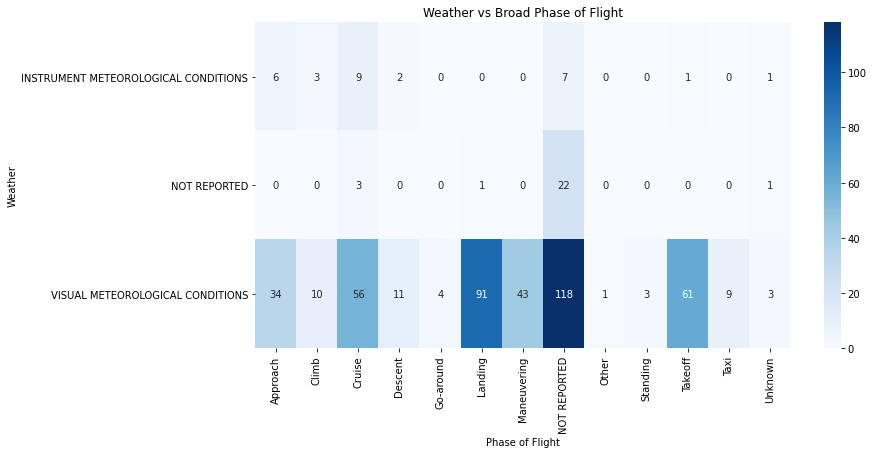

In [ ]:
# # Create a cross-tab
ct = pd.crosstab(df_sample['Weather.Condition'], df['Broad.phase.of.flight'])

plt.figure(figsize=(12,6))
sns.heatmap(ct, annot=True, fmt='d', cmap='Blues')
plt.title('Weather vs Broad Phase of Flight')
plt.xlabel('Phase of Flight')
plt.ylabel('Weather')
plt.show()

In [ ]:
sdfghjk

NameError: name 'sdfghjk' is not defined

In [ ]:
# Save as Excel
df.to_excel('final_phase1_dataframe.xlsx', index=False)
